## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
!pip install yfinance


[*********************100%%**********************]  1 of 1 completed


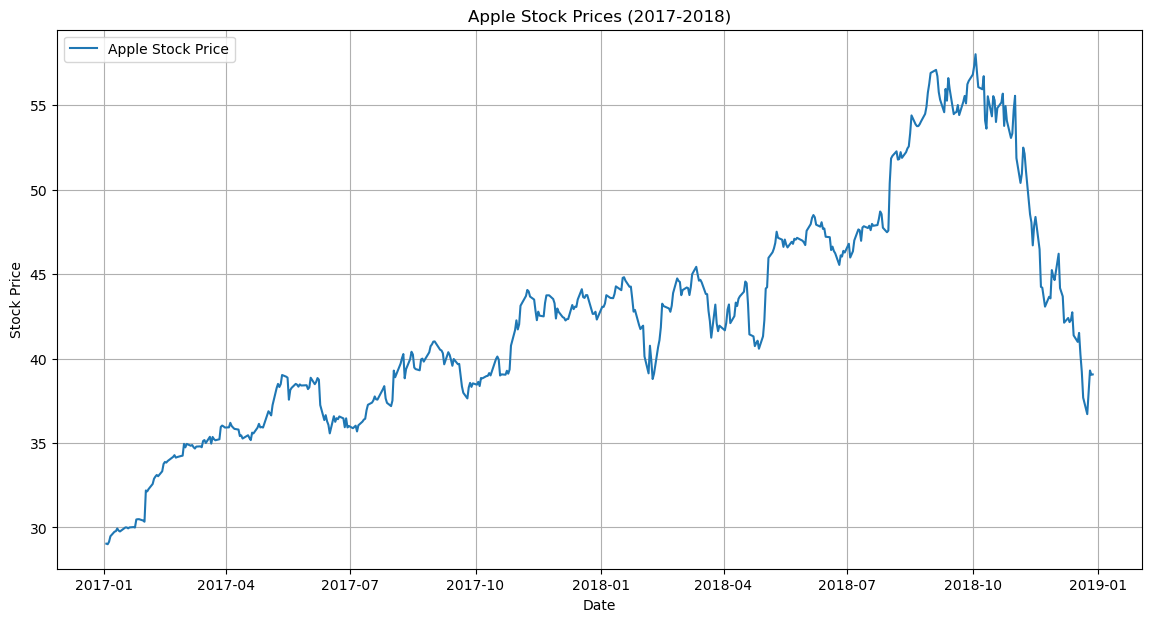

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Определим временной интервал
start_date = '2017-01-01'
end_date = '2018-12-31'

# Загрузим данные о ценах акций Apple
df = yf.download('AAPL', start=start_date, end=end_date)

# Визуализируем временной ряд цен акций
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Apple Stock Price')
plt.title('Apple Stock Prices (2017-2018)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


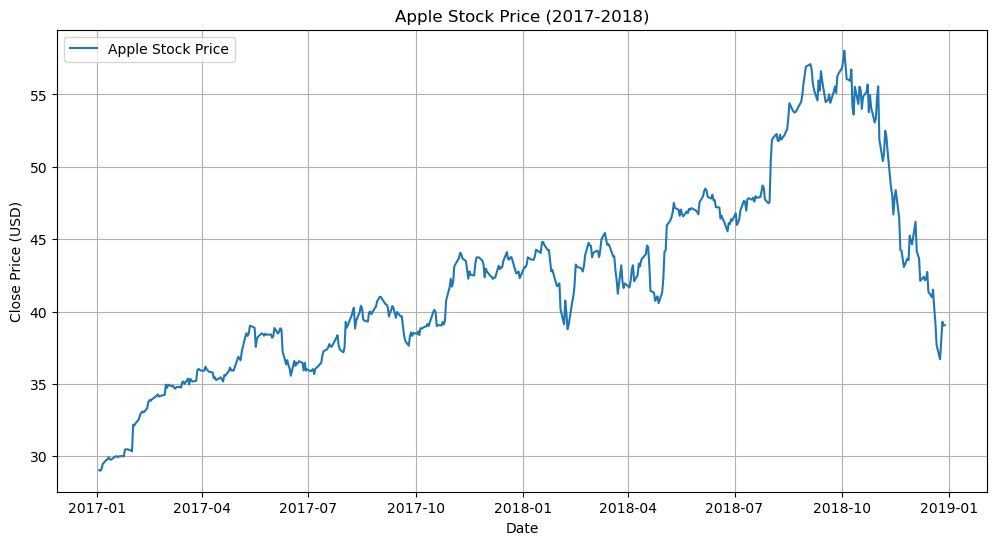

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Определите диапазон дат
start_date = '2017-01-01'
end_date = '2018-12-31'

# Загрузите данные о ценах акций Apple
df = yf.download('AAPL', start=start_date, end=end_date) #загрузка файлов в DataFrame

# Визуализируйте данные
plt.figure(figsize=(12, 6)) #окно размером 12x6
plt.plot(df.index, df['Close'], label='Apple Stock Price') #картинка ниже
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Apple Stock Price (2017-2018)')
plt.legend() #вызывает легенду (Apple Stock Price)
plt.grid(True) #сетка
plt.show()



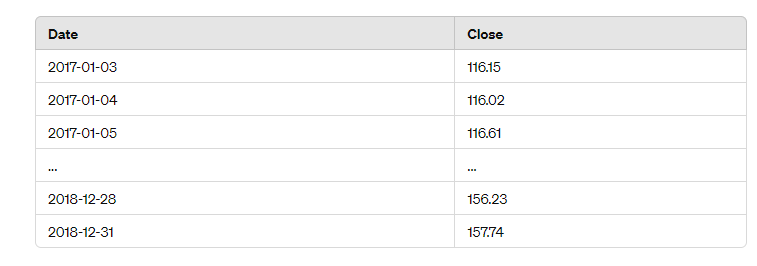

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

Межквартильный размах (IQR, от англ. Interquartile Range) — это мера статистического рассеяния, которая равна разнице между третьим (Q3) и первым (Q1) квартилями. IQR используется для определения разброса центральных 50% данных.

Вычисление IQR:
Первый квартиль (Q1) — это 25-й процентиль данных, т.е., значение, ниже которого находится 25% наблюдений.
Третий квартиль (Q3) — это 75-й процентиль данных, т.е., значение, ниже которого находится 75% наблюдений.
IQR = Q3 - Q1
Использование IQR для обнаружения выбросов
Для обнаружения выбросов часто используют метод IQR. Выбросы определяются как значения, которые лежат ниже нижней границы или выше верхней границы, определяемых следующим образом:

Нижняя граница: Q1 - 1.5 * IQR
Верхняя граница: Q3 + 1.5 * IQR

[*********************100%%**********************]  1 of 1 completed


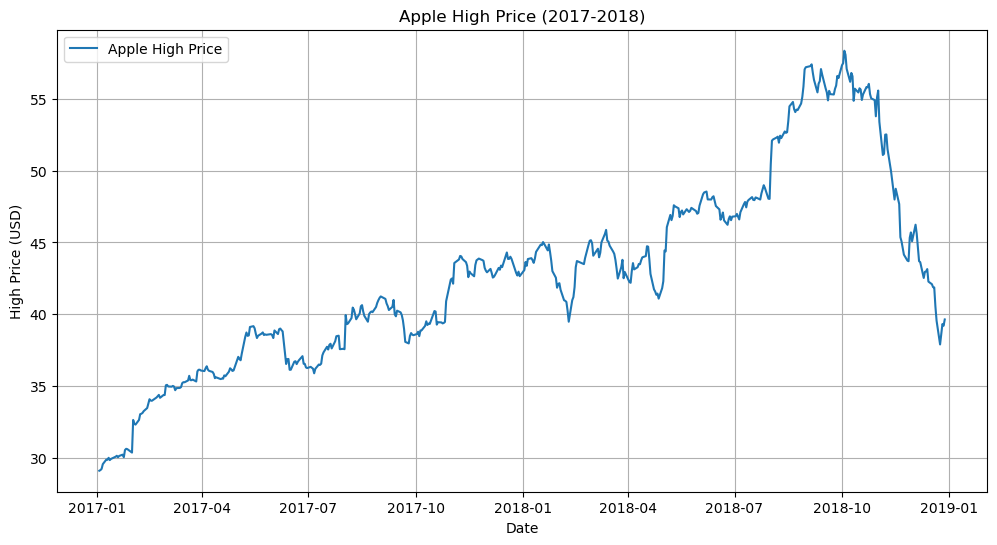

Количество выбросов: 0
Выбросы:
Series([], Name: High, dtype: float64)


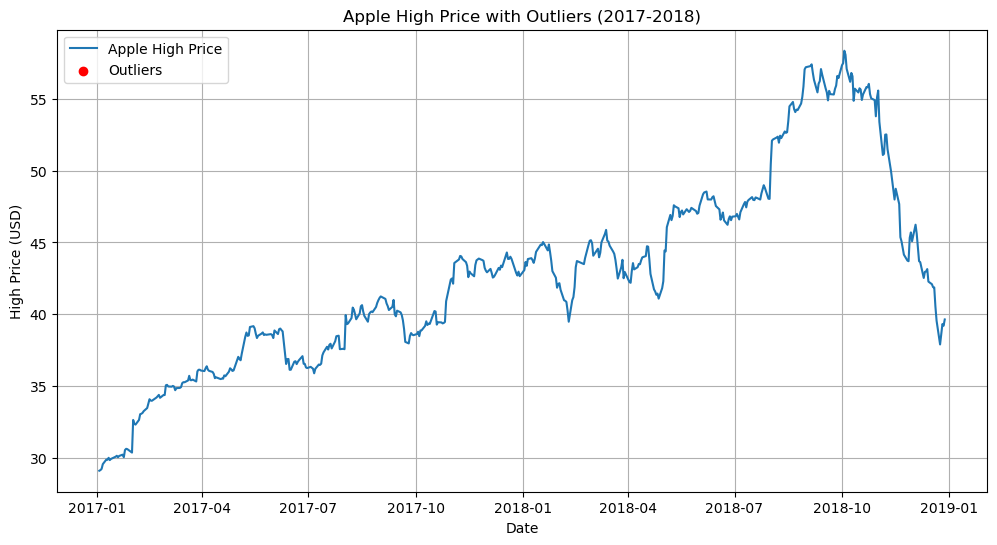

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
start_date = '2017-01-01'
end_date = '2018-12-31'
df = yf.download('AAPL', start=start_date, end=end_date)

# Извлечение данных о максимальной цене
max_prices = df['High']

# Построение графика максимальных цен
plt.figure(figsize=(12, 6))
plt.plot(max_prices.index, max_prices, label='Apple High Price')
plt.xlabel('Date')
plt.ylabel('High Price (USD)')
plt.title('Apple High Price (2017-2018)')
plt.legend()
plt.grid(True)
plt.show()

# Анализ выбросов
# Используем метод межквартильного размаха (IQR) для обнаружения выбросов
Q1 = np.percentile(max_prices, 25)
Q3 = np.percentile(max_prices, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбросы
outliers = max_prices[(max_prices < lower_bound) | (max_prices > upper_bound)]

print("Количество выбросов:", len(outliers))
print("Выбросы:")
print(outliers)

# Построение графика с выбросами
plt.figure(figsize=(12, 6))
plt.plot(max_prices.index, max_prices, label='Apple High Price')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('High Price (USD)')
plt.title('Apple High Price with Outliers (2017-2018)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


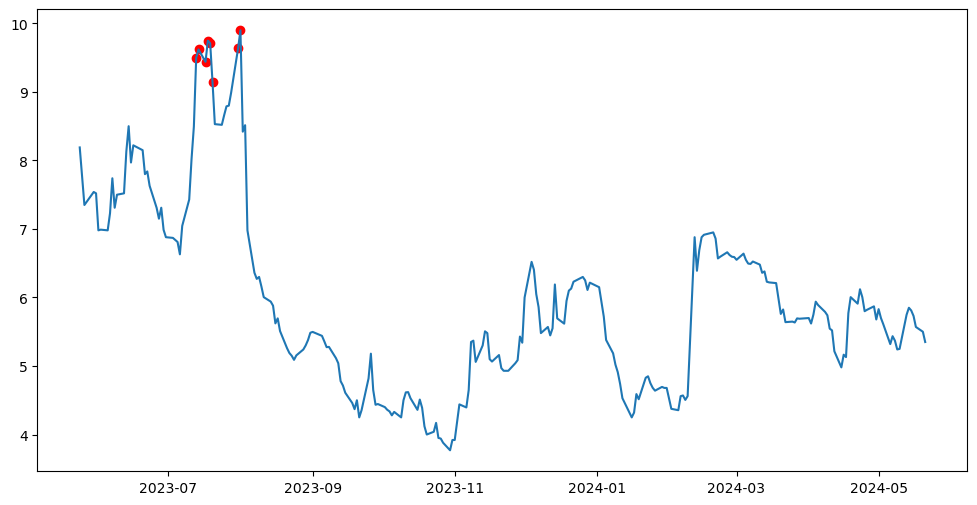

ВЫбросы:
Date
2023-07-13    9.5000
2023-07-14    9.6200
2023-07-17    9.4400
2023-07-18    9.7485
2023-07-19    9.7108
2023-07-20    9.1500
2023-07-31    9.6400
2023-08-01    9.9000
Name: High, dtype: float64


In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

ticker = 'WISH'
df = yf.download(ticker, start=start_date, end=end_date)

high_prices = df['High']

Q1 = np.percentile(high_prices, 25)
Q3 = np.percentile(high_prices, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = high_prices[(high_prices < lower_bound) | (high_prices > upper_bound)]

plt.figure(figsize=(12, 6))
plt.plot(high_prices.index, high_prices)
plt.scatter(outliers.index, outliers, color='red')
plt.show()

print("Выбросы:")
print(outliers)


## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

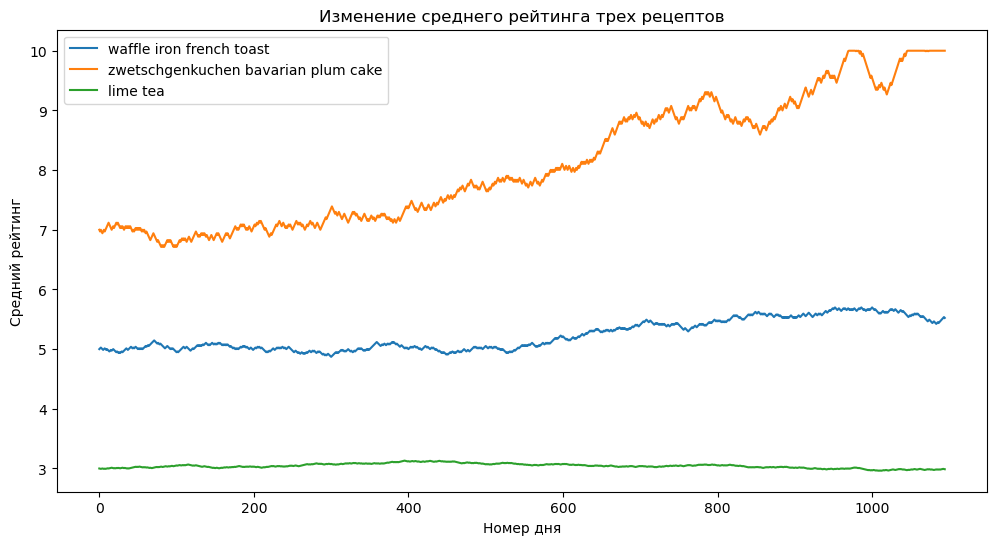

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = np.load('average_ratings.npy')

# Названия рецептов
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

# Количество дней (длина временного ряда)
num_days = data.shape[1]

# Создание фигуры и осей
plt.figure(figsize=(12, 6))

# Построение временных рядов
for i in range(data.shape[0]):
    plt.plot(range(num_days), data[i], label=recipes[i])

# Добавление подписей осей
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

# Добавление заголовка
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


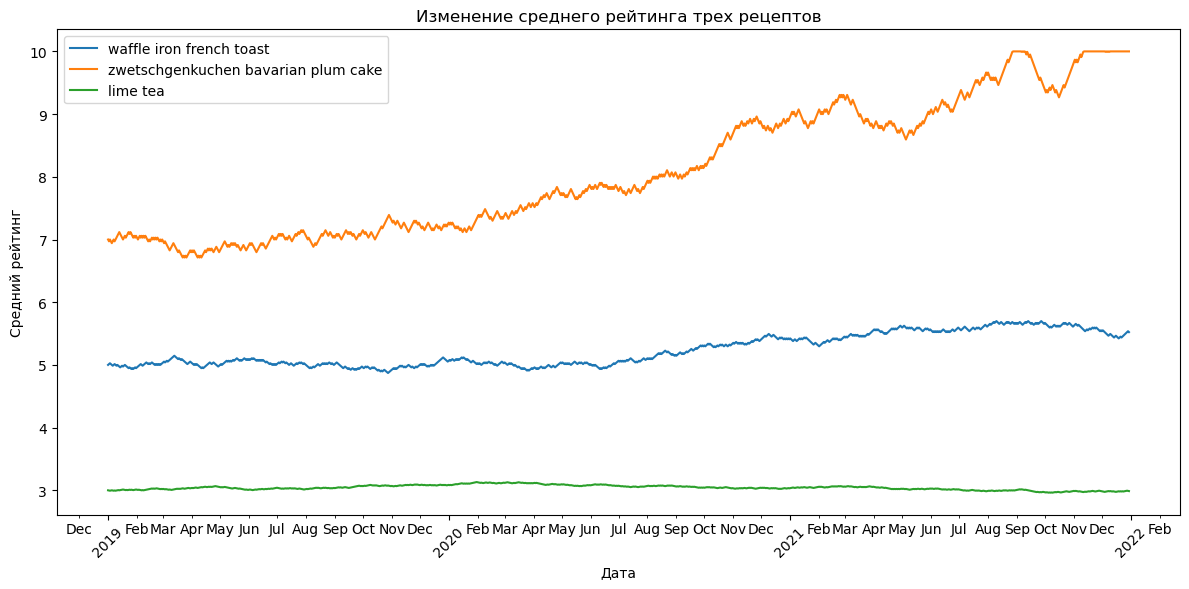

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Загрузка данных из файла
data = np.load('average_ratings.npy')

# Названия рецептов
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

# Создание диапазона дат
dates = pd.date_range(start="2019-01-01", end="2021-12-30")

# Создание фигуры и осей
plt.figure(figsize=(12, 6))

# Построение временных рядов
for i in range(data.shape[0]):
    plt.plot(dates, data[i], label=recipes[i])

# Настройка формата оси X для отображения годов и месяцев
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Добавление подписей осей
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

# Добавление заголовка
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Поворот меток оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

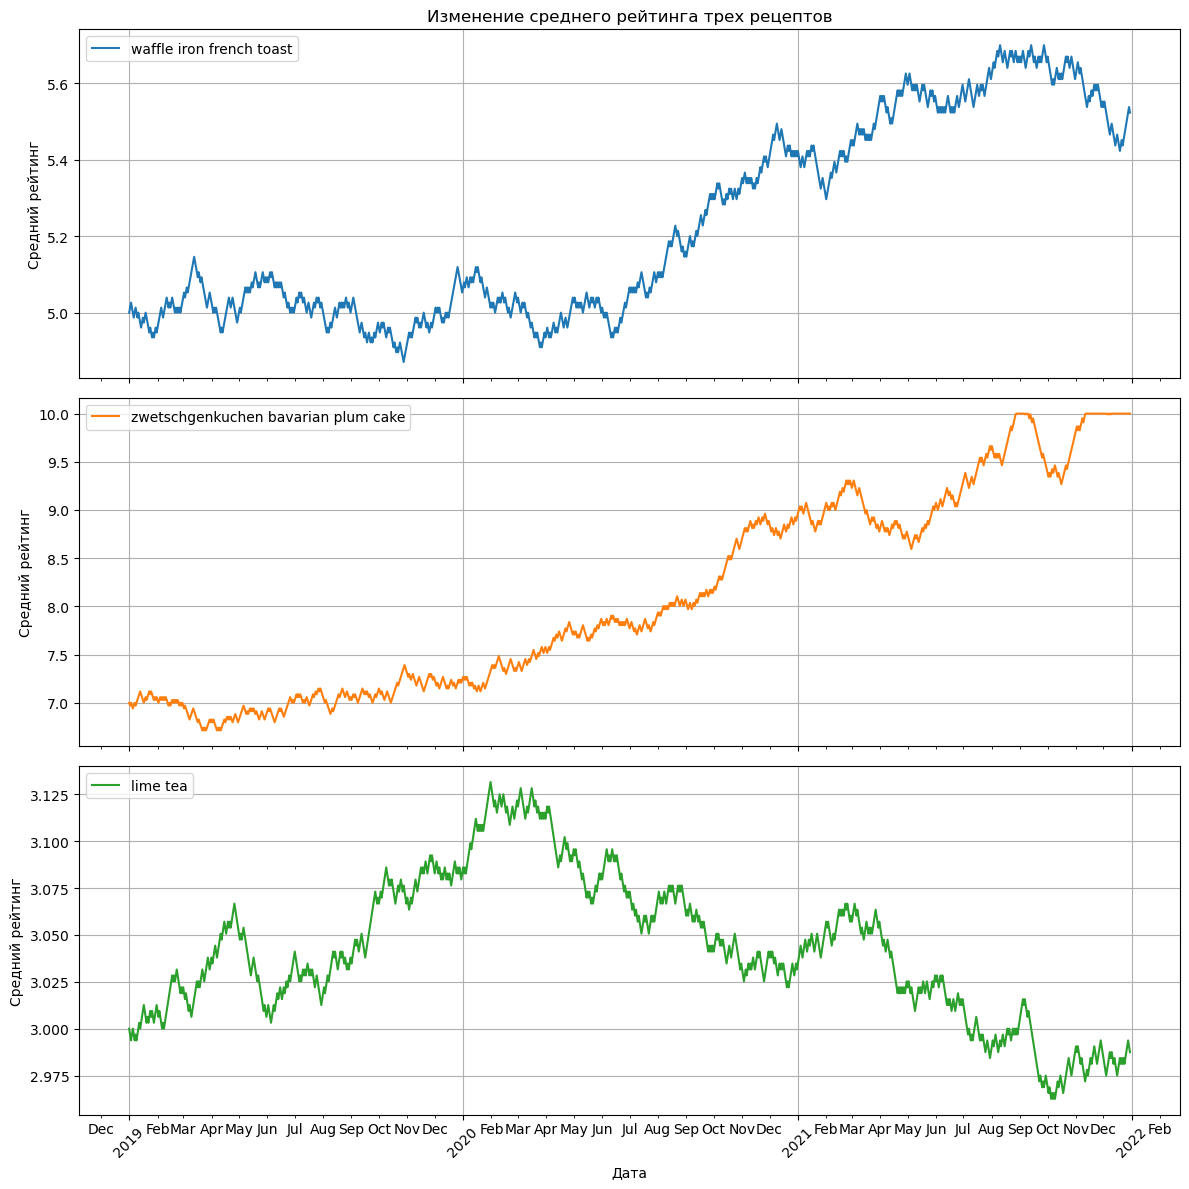

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Загрузка данных из файла
data = np.load('average_ratings.npy')

# Названия рецептов
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

# Создание диапазона дат
dates = pd.date_range(start="2019-01-01", end="2021-12-30")

# Создание фигуры и субплотов
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Построение временных рядов для каждого рецепта на отдельном subplot
for i in range(data.shape[0]):
    axs[i].plot(dates, data[i], label=recipes[i], color=f"C{i}")
    axs[i].set_ylabel('Средний рейтинг')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)

# Настройка формата оси X для отображения годов и месяцев
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())
axs[2].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Добавление подписи к общей горизонтальной оси
axs[2].set_xlabel('Дата')

# Добавление заголовка к верхнему subplot
axs[0].set_title('Изменение среднего рейтинга трех рецептов')

# Поворот меток оси X для лучшей читаемости
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)

# Автоматическая настройка параметров компоновки
plt.tight_layout()

# Отображение графика
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


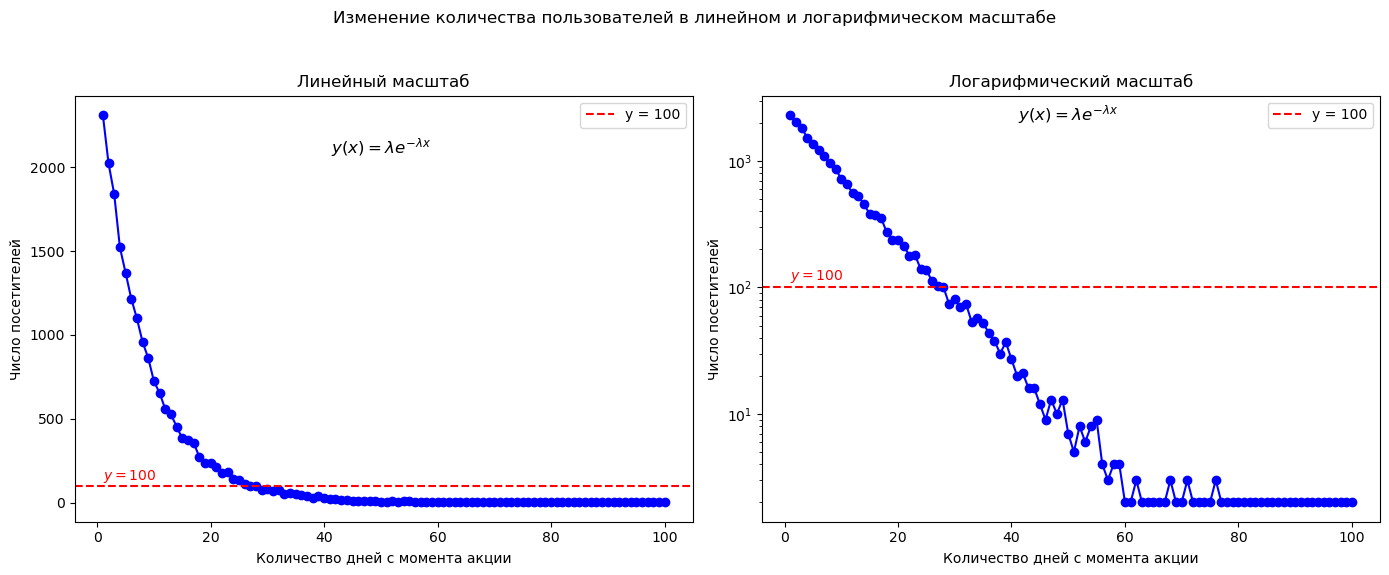

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла
visitors = np.load('visitors.npy')

# Дни с момента акции
days = np.arange(1, 101)

# Создание фигуры и субплотов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Построение графика с линейным масштабом
ax1.plot(days, visitors, marker='o', linestyle='-', color='b')
ax1.set_title('Линейный масштаб')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')

# Построение графика с логарифмическим масштабом по вертикальной оси
ax2.plot(days, visitors, marker='o', linestyle='-', color='b')
ax2.set_yscale('log')
ax2.set_title('Логарифмический масштаб')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')

# Добавление красной горизонтальной линии на уровне 100 и подписи к ней
for ax in [ax1, ax2]:
    ax.axhline(y=100, color='r', linestyle='--', label='y = 100')
    ax.text(1, 105, '$y = 100$', color='r', verticalalignment='bottom')

# Добавление текстовой аннотации над графиками
for ax in [ax1, ax2]:
    ax.text(50, max(visitors)*0.9, r'$y(x)=\lambda e^{-\lambda x}$', fontsize=12, horizontalalignment='center')

# Добавление общего заголовка для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

# Добавление легенды
ax1.legend()
ax2.legend()

# Отображение графика
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [10]:
recipes = pd.read_csv('recipes_sample.csv')
# Загрузка данных из файла reviews_sample.csv, учитывая безымянный столбец как индекс
reviews = pd.read_csv('reviews_sample.csv', index_col=0) #index_col - для корректное считывание столбца с индексами
# Вывод первых нескольких строк каждого DataFrame для проверки
print("Первые строки таблицы recipes:")
display(recipes.head()) # display - делает красивые таблички
print("\nПервые строки таблицы reviews:")
reviews.head()

Первые строки таблицы recipes:


,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN



Первые строки таблицы reviews:


,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

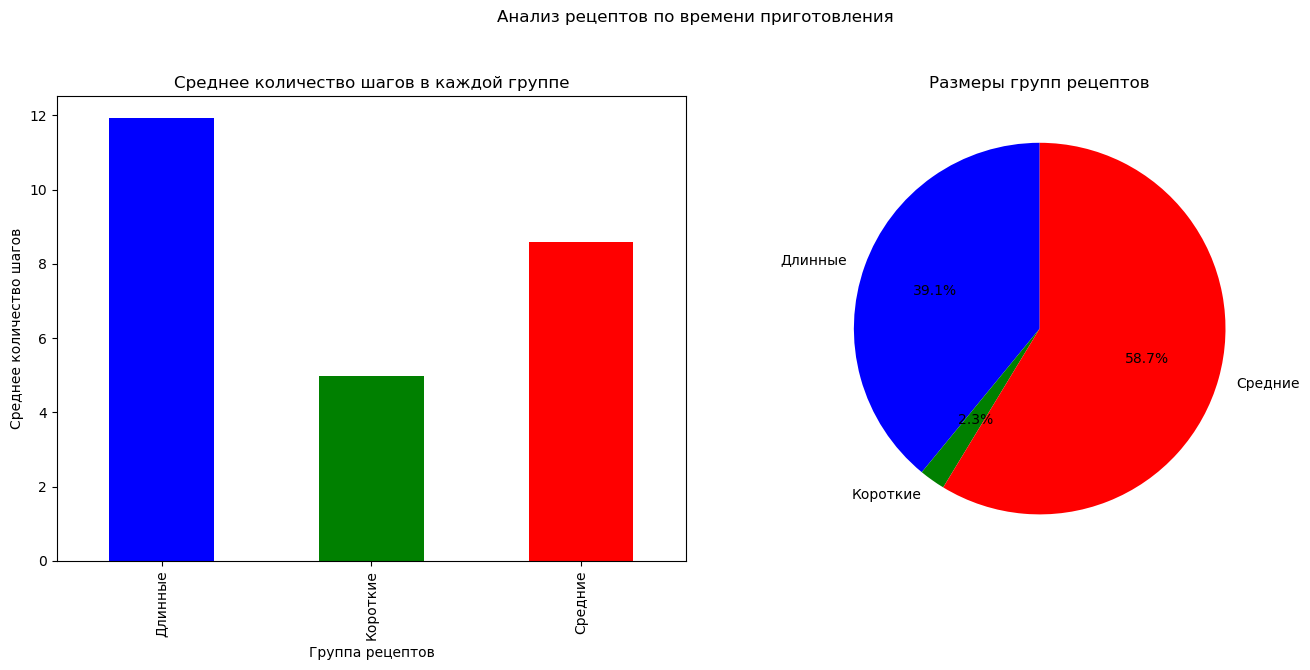

In [11]:
def categorize_recipe(minutes):
    if minutes < 5:
        return 'Короткие'
    elif 5 <= minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'

recipes['category'] = recipes['minutes'].apply(categorize_recipe)

# Группировка рецептов по категориям и расчет средней длительности и размера группы
grouped_recipes = recipes.groupby('category').agg({
    'n_steps': 'mean',
    'id': 'size'
}).rename(columns={'n_steps': 'average_steps', 'id': 'group_size'})

# Построение столбчатой диаграммы для среднего количества шагов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

grouped_recipes['average_steps'].plot(kind='bar', ax=ax1, color=['blue', 'green', 'red'])
ax1.set_title('Среднее количество шагов в каждой группе')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Среднее количество шагов')

# Построение круговой диаграммы для размеров групп
grouped_recipes['group_size'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red'])
ax2.set_title('Размеры групп рецептов')
ax2.set_ylabel('')

# Добавление общего заголовка для фигуры
fig.suptitle('Анализ рецептов по времени приготовления')

# Отображение графиков
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

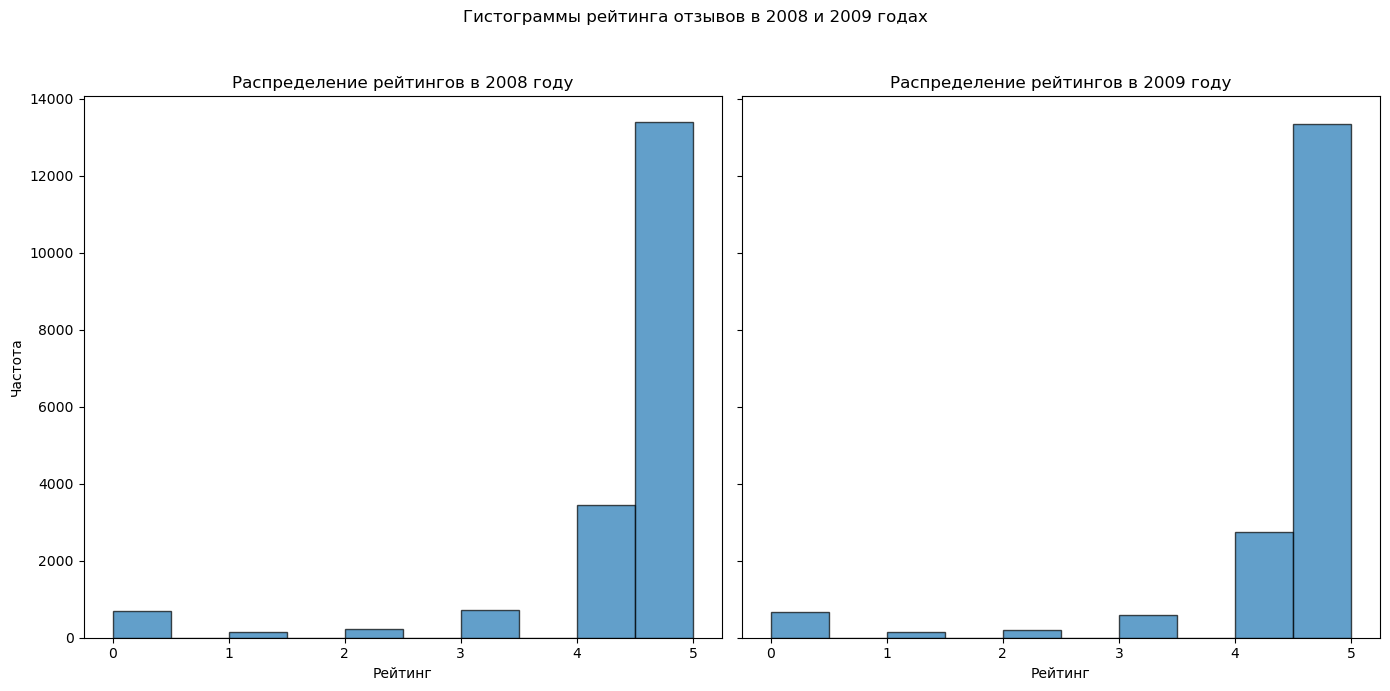

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
reviews = pd.read_csv('reviews_sample.csv', index_col=0)

# Преобразование столбца date в формат datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Фильтрация отзывов за 2008 и 2009 годы
reviews_2008 = reviews[reviews['date'].dt.year == 2008]
reviews_2009 = reviews[reviews['date'].dt.year == 2009]

# Создание фигуры и субплотов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Построение гистограмм для 2008 и 2009 годов
reviews_2008['rating'].plot.hist(ax=ax1, bins=10, edgecolor='black', alpha=0.7)
reviews_2009['rating'].plot.hist(ax=ax2, bins=10, edgecolor='black', alpha=0.7)

# Настройка заголовков субплотов
ax1.set_title('Распределение рейтингов в 2008 году')
ax2.set_title('Распределение рейтингов в 2009 году')

# Добавление подписей осей
ax1.set_xlabel('Рейтинг')
ax2.set_xlabel('Рейтинг')
ax1.set_ylabel('Частота')

# Добавление общей подписи для всей фигуры
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

# Автоматическая настройка параметров компоновки
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Отображение графиков
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

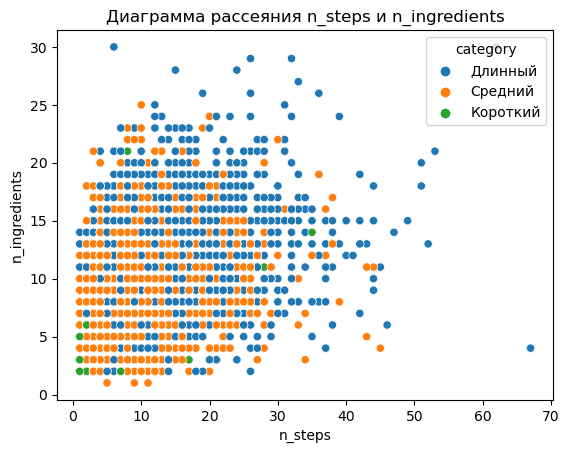

In [13]:
import seaborn as sns
import pandas as pd

# Загрузка данных из файла
recipes = pd.read_csv('recipes_sample.csv')

# Определение категорий рецептов
def categorize_recipe(minutes):
    if minutes < 5:
        return 'Короткий'
    elif 5 <= minutes < 50:
        return 'Средний'
    else:
        return 'Длинный'

recipes['category'] = recipes['minutes'].apply(categorize_recipe)

# Построение диаграммы рассеяния
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='category')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
print()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

                minutes   n_steps  n_ingredients    rating
minutes        1.000000  0.030675      -0.006254 -0.025770
n_steps        0.030675  1.000000       0.293526 -0.019057
n_ingredients -0.006254  0.293526       1.000000  0.003405
rating        -0.025770 -0.019057       0.003405  1.000000


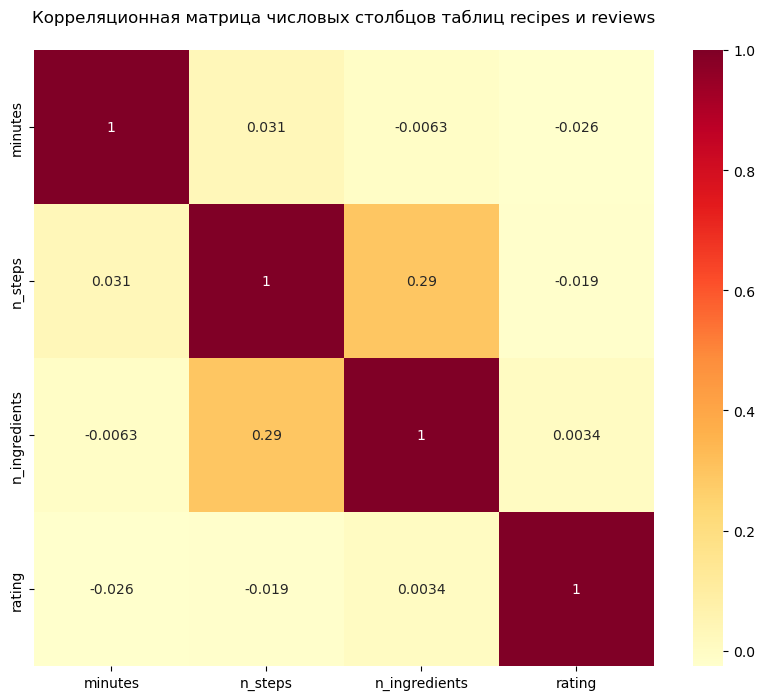

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файлов
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv')
reviews.rename(columns={'recipe_id': 'id'}, inplace=True)

# Объединение таблиц по общему ключу
merged_data = pd.merge(recipes, reviews, on='id')

# Выбор только числовых столбцов
numerical_columns = merged_data[['minutes', 'n_steps', 'n_ingredients', 'rating']]

# Построение корреляционной матрицы
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', pad=20)
plt.show()